#### Import of Libraries

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

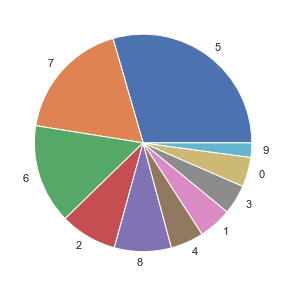

In [301]:
df = pd.read_csv('datasets/mechanicalAnalysis/mechanicalAnalysis.csv')
#df_cd = pd.merge(df["at1"],df["height"], how='inner',left_on=None)
#df=df.drop(columns=["id"])
df=df.replace("va",0)
df=df.replace("vv",1)
df=df.replace("ao",2)
df=df.replace("aa",3)
df=df.replace("av",4)
df=df.replace("io",5)
df=df.replace("ia",6)
df=df.replace("iv",7)
df=df.replace("vo",8)
df=df.replace("ma",9)
df=df.dropna(axis=0, how="any")
df=df.head(1500)
#df.to_csv('mechanicalAnalysis_edited.csv', index=False)
y =df['dir']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [302]:
df.head(5)

,Class,component,sup,cpm,mis,misr,dir,omega
0,1.0,0.0,3.0,0.0,120.0,21.0,2,1000.0
1,1.0,1.0,3.0,0.0,55.0,7.5,3,1000.0
2,1.0,2.0,3.0,0.0,26.0,1.4,8,1000.0
3,1.0,3.0,3.0,0.0,11.0,0.8,0,1000.0
4,1.0,4.0,2.0,0.0,7.0,5.5,2,1000.0


In [303]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Class      1500 non-null   float64
 1   component  1500 non-null   float64
 2   sup        1500 non-null   float64
 3   cpm        1500 non-null   float64
 4   mis        1500 non-null   float64
 5   misr       1500 non-null   float64
 6   dir        1500 non-null   int64  
 7   omega      1500 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 105.5 KB
Number of duplicated rows is:  6
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

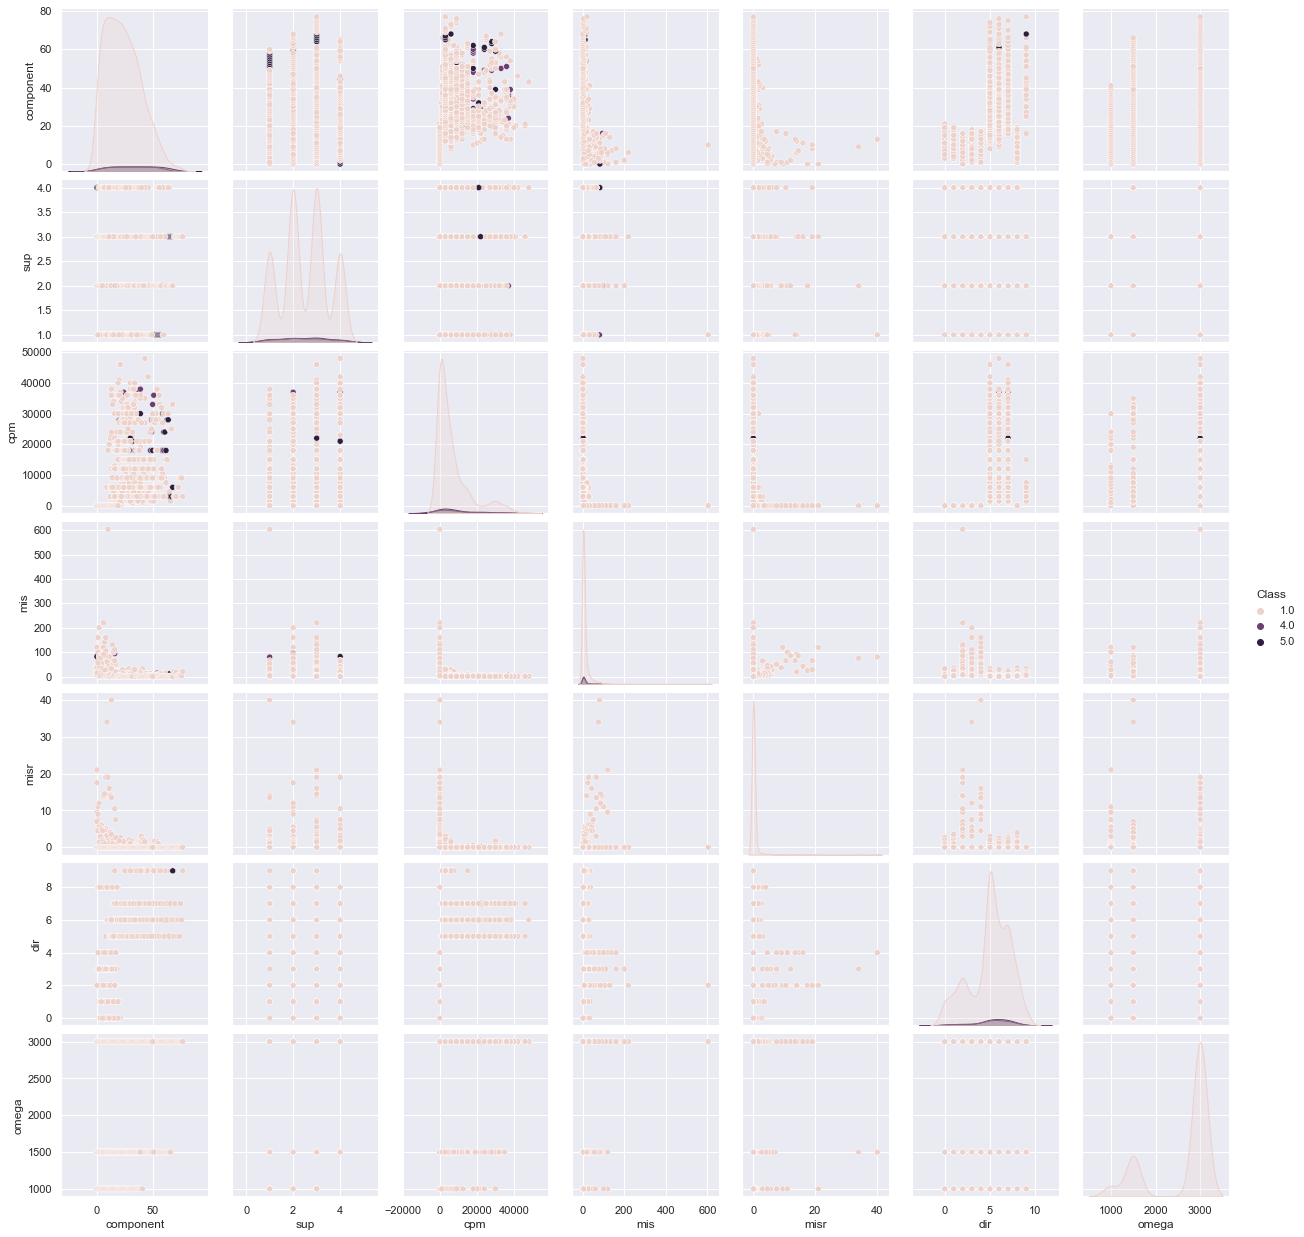

In [304]:
sns.pairplot(df, hue='Class')
plt.show()

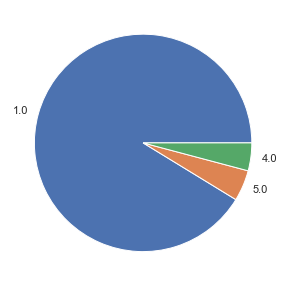

In [305]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [306]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
component,1500.0,24.332000,16.377116,0.0,11.0,22.0,35.000,77.0
sup,1500.0,2.491333,0.995952,1.0,2.0,2.0,3.000,4.0
cpm,1500.0,7000.600000,9575.540209,0.0,0.0,3000.0,9000.000,48000.0
mis,1500.0,9.587700,24.395104,0.2,1.0,2.7,7.525,604.0
misr,1500.0,0.311267,2.060940,0.0,0.0,0.0,0.000,40.0
dir,1500.0,5.038667,2.202212,0.0,4.0,5.0,7.000,9.0
omega,1500.0,2638.333333,676.265810,1000.0,3000.0,3000.0,3000.000,3000.0


#### Standardize the Data

In [307]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
component,1500.0,-3.789561e-17,1.000334,-1.486227,-0.814334,-0.142441,0.651614,3.217023
sup,1500.0,-8.763360e-17,1.000334,-1.497895,-0.493495,-0.493495,0.510905,1.515304
cpm,1500.0,-9.473903e-18,1.000334,-0.731336,-0.731336,-0.417933,0.208872,4.283108
mis,1500.0,9.473903e-18,1.000334,-0.384947,-0.352143,-0.282434,-0.084582,24.374175
misr,1500.0,4.736952e-18,1.000334,-0.151082,-0.151082,-0.151082,-0.151082,19.264008
dir,1500.0,-5.033011e-17,1.000334,-2.288766,-0.471804,-0.017564,0.890917,1.799397
omega,1500.0,-3.789561e-16,1.000334,-2.423425,0.534978,0.534978,0.534978,0.534978


#### Observations and Variables

In [308]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

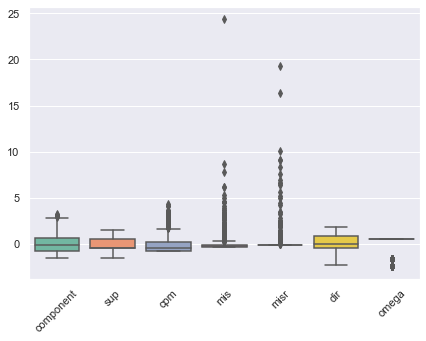

In [309]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

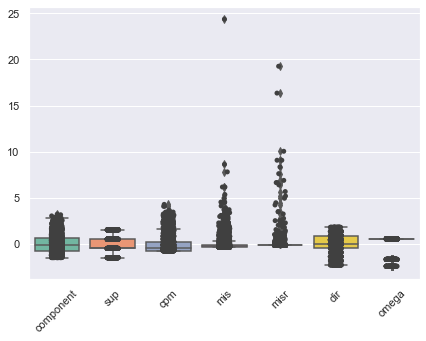

In [310]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

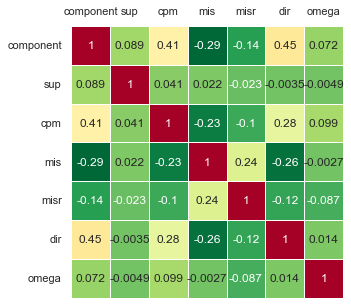

In [311]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [312]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [313]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,6.662008,7.338106,-0.095778,5.592323,-0.852155,-1.369698,-0.064788
1,3.513100,3.357554,-0.703590,0.859029,-0.475323,-0.142144,-0.325252
2,1.089356,1.965205,-1.335796,-0.952546,1.058419,0.348858,-1.445265
3,2.457453,1.012619,-0.856794,-1.868218,-1.479356,0.192236,0.387881
4,2.594089,1.958473,-1.850983,0.104768,-1.293049,-0.878681,0.082875
...,...,...,...,...,...,...,...
1495,-0.914162,0.051860,0.672178,-0.037116,0.217179,-0.314849,0.994029
1496,-1.387326,0.237021,0.512280,0.107723,0.816275,-0.352836,0.588880
1497,-1.219235,0.155977,0.584811,0.034890,0.513234,-0.358959,0.861503
1498,-1.168810,0.122593,0.714299,0.064934,0.031909,-0.192908,1.029783


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'7 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (29.5% expl.var)', ylabel='PC2 (14.8% expl.var)'>)

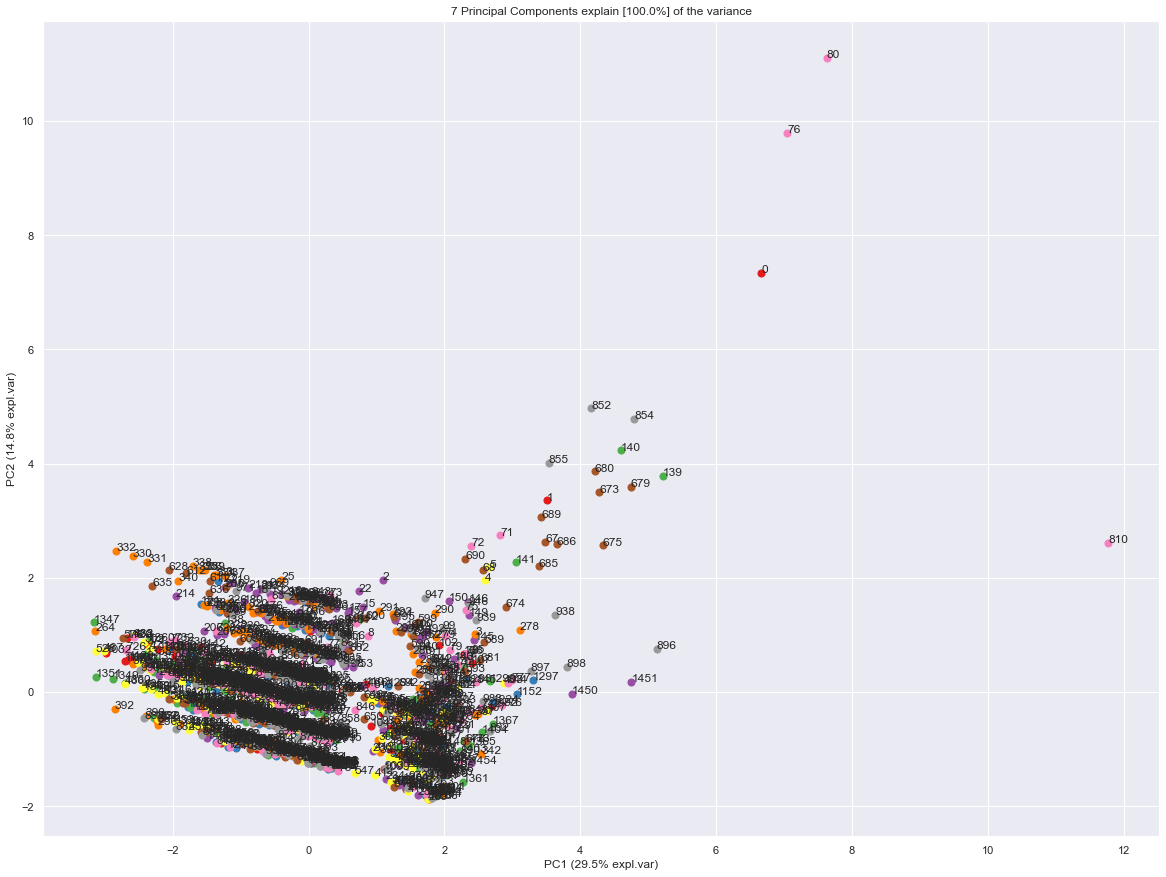

In [314]:
model.scatter(label=True, legend=False)

Eigenvectors

In [315]:
A = out['loadings'].T

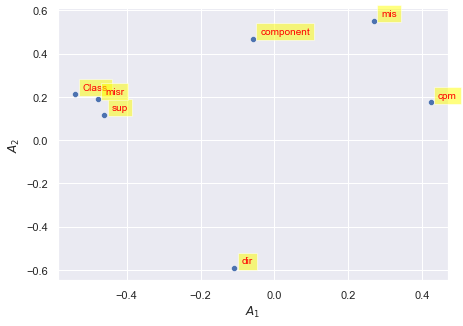

In [316]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

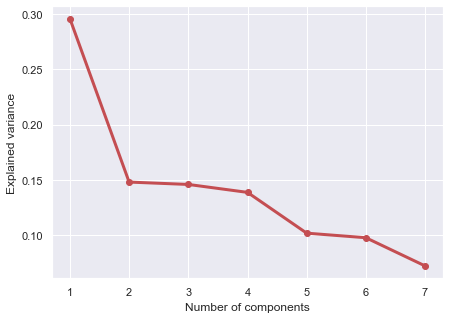

In [317]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

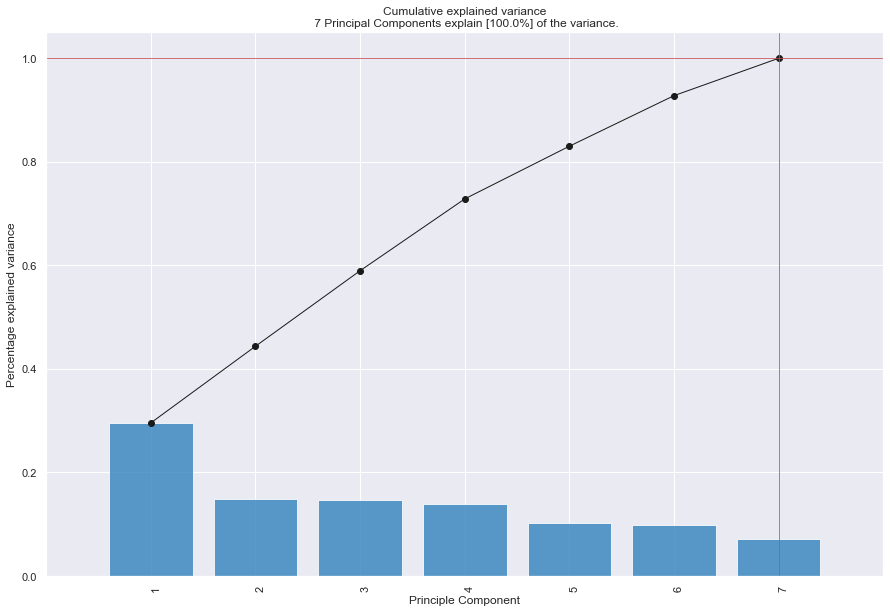

<Figure size 504x360 with 0 Axes>

In [318]:
model.plot();